In [88]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [89]:
# Inspect the data
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [90]:
# Inspect the data
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


# Data cleaning

### Handling Missing Values and '?'

In [91]:
import numpy as np
# Replace "?" with NaN in the specified columns using .loc
X.loc[X['workclass'] == "?", 'workclass'] = np.nan
X.loc[X['occupation'] == "?", 'occupation'] = np.nan
X.loc[X['native-country'] == "?", 'native-country'] = np.nan

# Impute missing values with the most frequent value (mode) using .loc[]
X.loc[:, 'workclass'] = X['workclass'].fillna(X['workclass'].mode()[0])
X.loc[:, 'occupation'] = X['occupation'].fillna(X['occupation'].mode()[0])
X.loc[:, 'native-country'] = X['native-country'].fillna(X['native-country'].mode()[0])

In [92]:
# Standardize original categorical columns
X.loc[:, 'native-country'] = X['native-country'].str.lower()

In [93]:
# Check for missing values in the features
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

### One-hot Encoding

In [94]:
# Perform one-hot encoding for categorical features
X = pd.get_dummies(X, columns=['workclass', 'education', 'marital-status', 'occupation',
                                          'relationship', 'race', 'sex', 'native-country'], drop_first=True)

### Ensuring Correct Data Types

In [95]:
X.loc[:, 'age'] = X['age'].astype(int)
X.loc[:, 'fnlwgt'] = X['fnlwgt'].astype(int)
X.loc[:, 'capital-gain'] = X['capital-gain'].astype(int)
X.loc[:, 'capital-loss'] = X['capital-loss'].astype(int)
X.loc[:, 'hours-per-week'] = X['hours-per-week'].astype(int)


In [96]:
# Check the data types of the columns
X.dtypes

age                               int64
fnlwgt                            int64
education-num                     int64
capital-gain                      int64
capital-loss                      int64
                                  ...  
native-country_thailand            bool
native-country_trinadad&tobago     bool
native-country_united-states       bool
native-country_vietnam             bool
native-country_yugoslavia          bool
Length: 97, dtype: object

### Feature Engineering

In [97]:
# Create a new feature 'net-capital-gain'
X['net-capital-gain'] = X['capital-gain'] - X['capital-loss']

# Drop the original 'capital-gain' and 'capital-loss' columns if no longer needed
X.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

In [98]:
# Drop `education-num` since it seems redundant
X.drop('education-num', axis=1, inplace=True)

In [99]:
X.head()

,age,fnlwgt,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_puerto-rico,native-country_scotland,native-country_south,native-country_taiwan,native-country_thailand,native-country_trinadad&tobago,native-country_united-states,native-country_vietnam,native-country_yugoslavia,net-capital-gain
0,39,77516,40,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,2174
1,50,83311,13,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
2,38,215646,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
3,53,234721,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
4,28,338409,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


# K-Means Clustering

In [100]:
#Scale the Data: Scale the features using StandardScaler.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

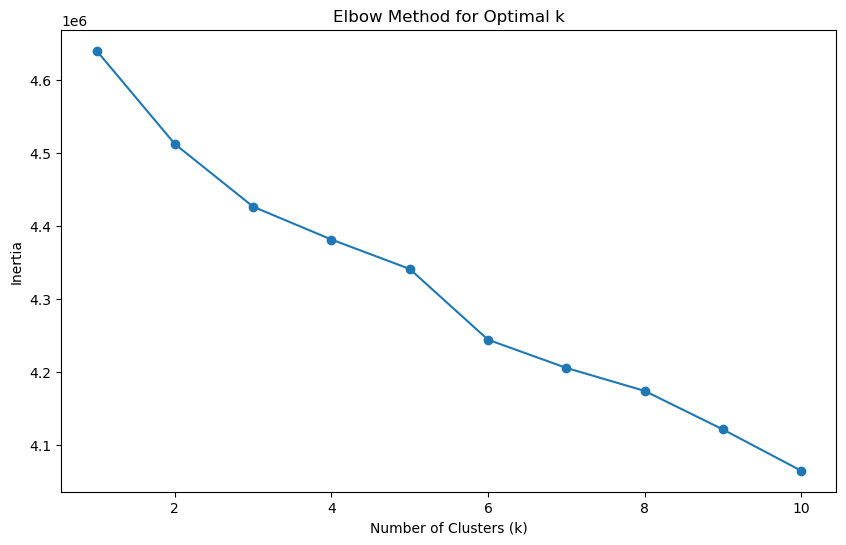

In [147]:
#Determine the Optimal Number of Clusters. You can use the elbow method to determine the optimal number of clusters.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=2)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


# Predict the clusters
clusters = kmeans.predict(scaled_data)

In [148]:
#Step 5: Fit the K-Means Model. Once you determine the optimal number of clusters (let's say it’s 3), fit the K-Means model.

# Fit the K-means model
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)

# Predict the clusters
clusters = kmeans.predict(scaled_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [149]:
#Step 6: Add Cluster Labels to the DataFrame. Add the cluster labels back to the original DataFrame.

X['Cluster'] = clusters

In [150]:
# 7 Analyze the Clusters. You can analyze the clusters by examining the mean of each feature within each cluster.

cluster_analysis = X.groupby('Cluster').mean()
print(cluster_analysis)

               age         fnlwgt  hours-per-week  workclass_Local-gov  \
Cluster                                                                  
0        34.229391  190346.001044       37.569824             0.061889   
1        43.785904  183703.981832       43.707393             0.071552   
2        37.381062  221596.661693       39.840459             0.035007   

         workclass_Never-worked  workclass_Private  workclass_Self-emp-inc  \
Cluster                                                                      
0                      0.000376           0.817798                0.012027   
1                      0.000047           0.664331                0.061324   
2                      0.000000           0.831564                0.026973   

         workclass_Self-emp-not-inc  workclass_State-gov  \
Cluster                                                    
0                          0.038002             0.042512   
1                          0.127925             0.040914  

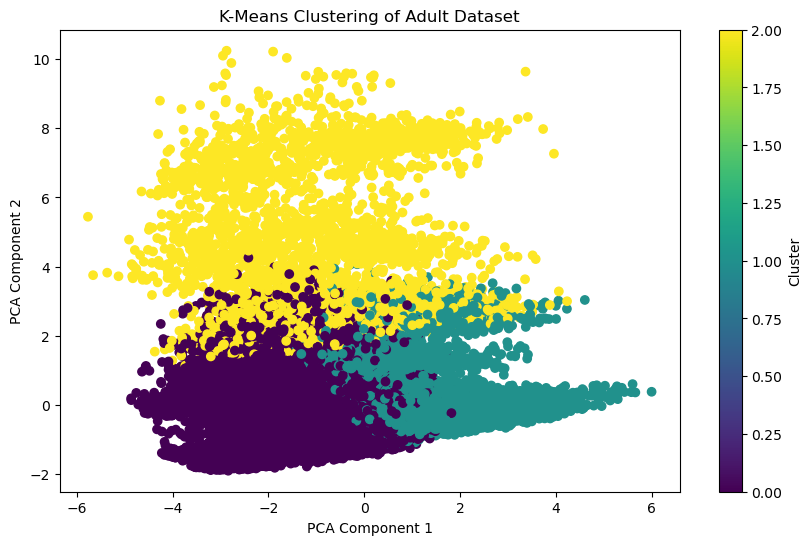

In [151]:
#Step 8: Visualize the Clusters. If you want to visualize the clusters, you can use a scatter plot. For this, you may want to use PCA to reduce dimensions.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Adult Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()